In [1]:
from pylab import rcParams
%pylab inline
from coronapy import load_data, set_default_styles
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [148]:
# some plot styling 
rcParams['figure.figsize'] = 12, 6
rcParams['axes.grid'] = True
rcParams['axes.grid.which'] = 'both'
rcParams['grid.alpha'] = 0.3


styles = {"France":{"color":"blue"}, 
          "Italy":{"color":"green"}, 
          "Spain":{"color":"red"}, 
          "Germany":{"color":"black"}, 
          "Hubei":{"color":"orange"}, 
          "US":{"color":"cyan"}
         }
set_default_styles(styles) # styles will be default for all graph


# Load data from github server and patch if needed 
The data is fetched from Johns Hopkins University Center for Systems Science and Engineering : https://github.com/CSSEGISandData/COVID-19

In [149]:
confirmed, death, recovered = load_data()
#patch some data taken from https://www.ars.sante.fr 
patch = [
    ('France', '2020-03-17', 173),
    ('France', '2020-03-18', 244),
    ('France', '2020-03-19', 372)
]
death.patch(patch)


## Select Data from Countries and dates bounds 
The subset function allows to get a selective portion of the data. It can take the following argument:

- names : str or name list is the Index name of the data, which is the state or region or the country if that country has no states/regions 
- state : str or list specify the states, ignored if name is not None
- country : str or list, ignored if name is not None 
- start : str, date, int, DataFrame. 
         if int and positive, offset from the begining of the data 
         if int and negative. offset from the end of data
         if DataFrame, look for the column 'date' inside for a single country, if DataFrame names should be a string to return one single Date Serie
- end : str, date, int, DataFrame 
        Same as start
   Note If the TimeFrame is indexed by day number instead of date (see bellow), the start and end refers to that day number      
- ndays : int
        If given end is ignored, gives ndays more after start date

In [150]:
confirmed.subset(['France', 'Italy', 'Spain'], start="2020-03-01")

,Province/State,Country/Region,Lat,Long,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
France,NaN,France,46.2276,2.2137,130,191,204,285,377,653,...,6633,7652,9043,10871,12612,14282,16018,19856,22304,25233
Italy,NaN,Italy,43.0000,12.0000,1694,2036,2502,3089,3858,4636,...,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386
Spain,NaN,Spain,40.0000,-4.0000,84,120,165,222,259,400,...,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515


In [151]:
# the last 10 days 
confirmed.subset(['France', 'Italy', 'Spain'], start=-10)

,Province/State,Country/Region,Lat,Long,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
France,NaN,France,46.2276,2.2137,6633,7652,9043,10871,12612,14282,16018,19856,22304,25233
Italy,NaN,Italy,43.0000,12.0000,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386
Spain,NaN,Spain,40.0000,-4.0000,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515


countries can have several Province or State

In [152]:
confirmed.subset(country="France")

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
French Guiana,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,11,11,11,11,15,18,18,20,23,28
French Polynesia,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,3,3,3,6,11,15,18,18,25,25
Guadeloupe,Guadeloupe,France,16.2500,-61.5833,0,0,0,0,0,0,...,6,18,27,33,45,53,58,62,62,73
Mayotte,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,1,1,3,3,6,7,11,24,36,36
New Caledonia,New Caledonia,France,-20.9043,165.6180,0,0,0,0,0,0,...,0,0,0,2,2,4,4,8,10,14
Reunion,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,9,9,12,14,28,45,64,71,94,111
Saint Barthelemy,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
St Martin,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,2,2,3,4,4,4,5,8,8,11
Martinique,Martinique,France,14.6415,-61.0242,0,0,0,0,0,0,...,15,16,19,23,32,32,44,53,57,66
France,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,6633,7652,9043,10871,12612,14282,16018,19856,22304,25233


When reducing, like summing rows from the same country, coronapy try guess name of the Serie according to the header of what is reduced. 

In [153]:
australias = confirmed.subset(country="Australia", start="2020-03-01")
australias

,Province/State,Country/Region,Lat,Long,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
Australian Capital Territory,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,2,2,3,4,6,9,19,32,39,39
New South Wales,New South Wales,Australia,-33.8688,151.2093,6,6,13,22,22,26,...,171,210,267,307,353,436,669,669,818,1029
Northern Territory,Northern Territory,Australia,-12.4634,130.8456,0,0,0,1,1,0,...,1,1,1,1,3,3,5,5,6,6
Queensland,Queensland,Australia,-28.0167,153.4000,9,9,11,11,13,13,...,68,78,94,144,184,221,259,319,397,443
South Australia,South Australia,Australia,-34.9285,138.6007,3,3,3,5,5,7,...,29,29,37,42,50,67,100,134,170,170
Tasmania,Tasmania,Australia,-41.4545,145.9707,0,1,1,1,1,1,...,7,7,10,10,10,16,22,28,28,36
Victoria,Victoria,Australia,-37.8136,144.9631,7,9,9,10,10,10,...,71,94,121,121,121,229,355,355,411,466
Western Australia,Western Australia,Australia,-31.9505,115.8605,2,2,2,2,3,3,...,28,31,35,52,64,90,120,140,175,175


In [154]:
australias.sum()

Province/State      _mixed_
Country/Region    Australia
2020-03-01               27
2020-03-02               30
2020-03-03               39
2020-03-04               52
2020-03-05               55
2020-03-06               60
2020-03-07               63
2020-03-08               76
2020-03-09               91
2020-03-10              107
2020-03-11              128
2020-03-12              128
2020-03-13              200
2020-03-14              250
2020-03-15              297
2020-03-16              377
2020-03-17              452
2020-03-18              568
2020-03-19              681
2020-03-20              791
2020-03-21             1071
2020-03-22             1549
2020-03-23             1682
2020-03-24             2044
2020-03-25             2364
Name: All Australia, dtype: object

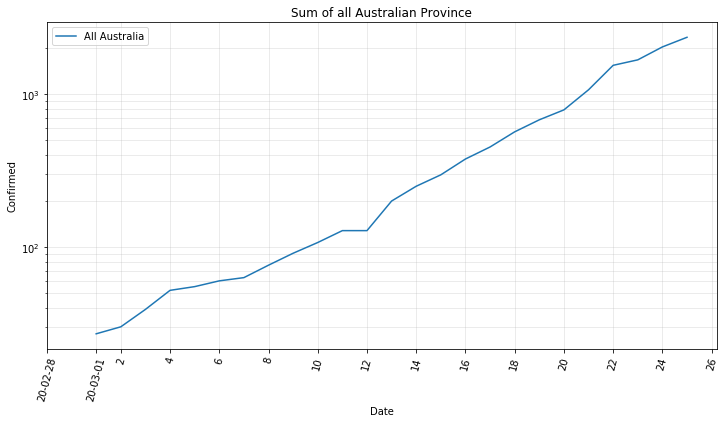

In [155]:
_ = australias.sum().plot().set(xlabel="Date", ylabel="Confirmed", title="Sum of all Australian Province", yscale="log")

Ones you have reduced one, you can still concatenate to others for comparaison. 

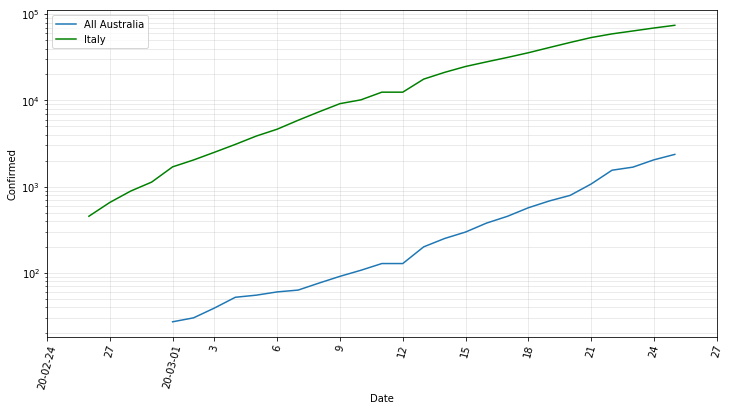

In [156]:
from coronapy import concatenate 
aus_itl = concatenate( [australias.sum(), confirmed.subset('Italy', start="2020-02-26") ]  )
_ = aus_itl.plot().set(xlabel="Date", ylabel="Confirmed", yscale="log")

One can also use the api function to get the same results 

Each rows is composed of a "header" giving state/country information and cases time sery data. 
If you need to do mathematical operations you can get read of the header part:

In [157]:
subset = confirmed.subset(['France', 'Italy', 'Spain'], start=-10)
subset.cases * 0.02

,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
France,132.66,153.04,180.86,217.42,252.24,285.64,320.36,397.12,446.08,504.66
Italy,559.60,630.12,714.26,820.70,940.42,1071.56,1182.76,1278.54,1383.52,1487.72
Spain,198.84,234.96,278.20,359.26,408.20,507.48,575.36,702.72,797.70,990.30


The header only is extracted with the header property :

In [158]:
subset.header

,Province/State,Country/Region,Lat,Long
France,NaN,France,46.2276,2.2137
Italy,NaN,Italy,43.0000,12.0000
Spain,NaN,Spain,40.0000,-4.0000


## Basic time seri plot of the data

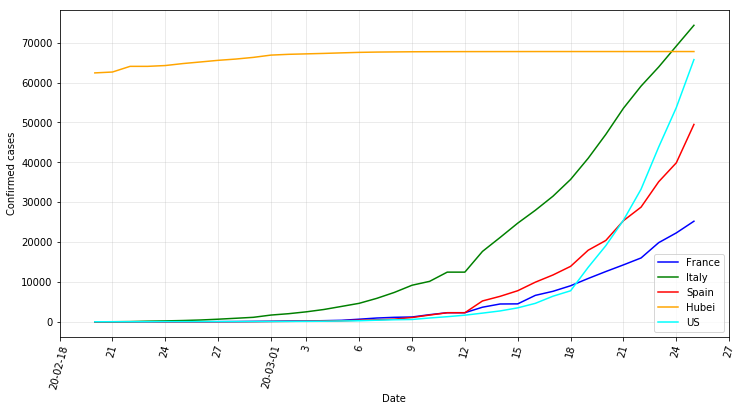

In [159]:
subset = confirmed.subset(['France', 'Italy', 'Spain', 'Hubei', 'US'], start="2020-02-20")
axes = subset.plot()
_ = axes.set(ylabel="Confirmed cases", xlabel="Date")

In log

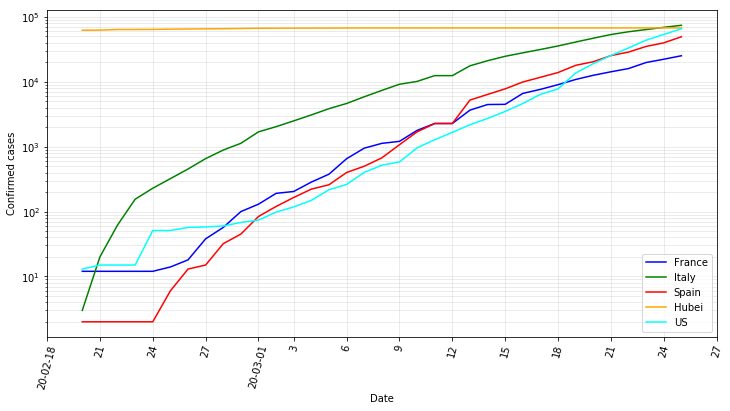

In [160]:
_ = subset.plot().set(yscale="log", ylabel='Confirmed cases', xlabel="Date")

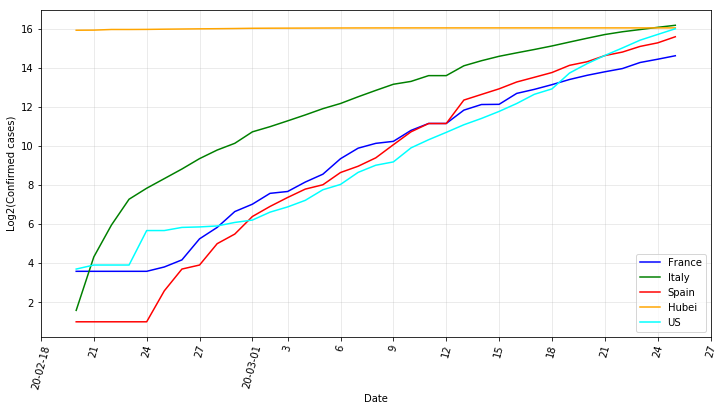

In [161]:
# Or we can plot the log instead of y log scale (log argument can be True (neperian), 2, 10 or False)
_ = subset.plot(log=2).set( ylabel='Log2(Confirmed cases)', xlabel="Date")

We can also change the data columns from absolute date to relative day number. For this we need a reference days which can be unique for all or specific for each rows.
The `get_day_indexed` allows to do that, its `zero_day` argument is either a date or a list of [(name,date)] or a DataFrame as created by `when_case_exceed` method. 

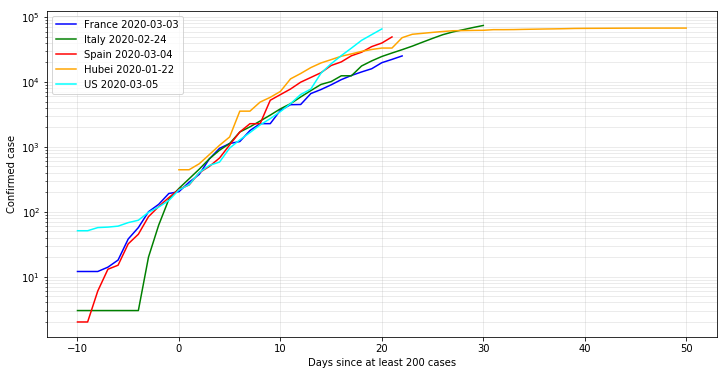

In [162]:
origins = confirmed.when_case_exceed(200) # the dates from when at least 100 case detected
subset = confirmed.subset(['France', 'Italy', 'Spain', 'Hubei', 'US'])

axes = subset.get_day_indexed(day_zero=origins).subset(start=-10, end=50).plot()
_ = axes.set(yscale="log", ylabel="Confirmed case", xlabel="Days since at least 200 cases")


If one need to retrieve the days has plotted above, the method `get_days` can do that, it returns a DataFrame or Serie of day numbers. In plots days argument can also be parsed instead of day_zero. 

In [163]:
# days since origin 
subset.get_days(origins)

,Province/State,Country/Region,Lat,Long,day_zero,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
France,NaN,France,46.2276,2.2137,2020-03-03,-41,-40,-39,-38,-37,...,13,14,15,16,17,18,19,20,21,22
Italy,NaN,Italy,43.0000,12.0000,2020-02-24,-33,-32,-31,-30,-29,...,21,22,23,24,25,26,27,28,29,30
Spain,NaN,Spain,40.0000,-4.0000,2020-03-04,-42,-41,-40,-39,-38,...,12,13,14,15,16,17,18,19,20,21
Hubei,Hubei,China,30.9756,112.2707,2020-01-22,0,1,2,3,4,...,54,55,56,57,58,59,60,61,62,63
US,NaN,US,37.0902,-95.7129,2020-03-05,-43,-42,-41,-40,-39,...,11,12,13,14,15,16,17,18,19,20


And the day indexed version looks like this, note that it can contains NaN

In [164]:
subset.get_day_indexed(origins).subset(start=0, end=30)

,Province/State,Country/Region,Lat,Long,day_zero,0,1,2,3,4,...,21,22,23,24,25,26,27,28,29,30
France,NaN,France,46.2276,2.2137,2020-03-03,204,285,377,653,949,...,22304,25233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Italy,NaN,Italy,43,12,2020-02-24,229,322,453,655,888,...,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386
Spain,NaN,Spain,40,-4,2020-03-04,222,259,400,500,673,...,49515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hubei,Hubei,China,30.9756,112.271,2020-01-22,444,444,549,761,1058,...,33366,48206,54406,56249,58182,59989,61682,62031,62442,62662
US,NaN,US,37.0902,-95.7129,2020-03-05,217,262,402,518,583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bellow we plotting several country starting from a day zero

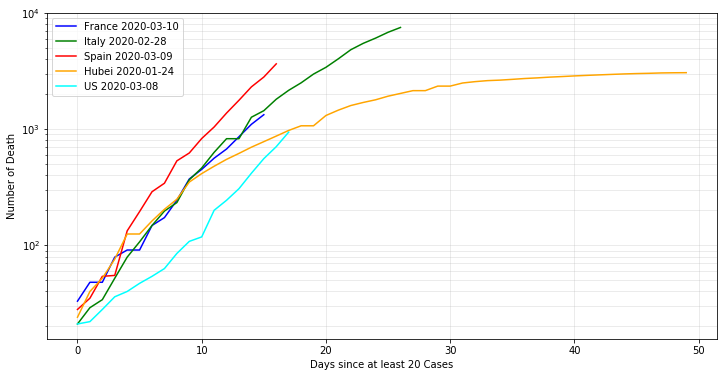

In [165]:
origins = death.when_case_exceed(20)
data = death.subset(['France', 'Italy', 'Spain', 'Hubei', 'US']).get_day_indexed(origins)
data = data.subset(start=0, ndays=50) # 30 days max 
_ = data.plot().set(xlabel='Days since at least 20 Cases', ylabel='Number of Death', yscale="log")

## Intervals
The `intervals` method is building a list of date interval from start, end, window size (in days) etc ...
This instervals (DataFrame) can be used to split the data. 
Bellow we plot the evolution of death from days zero wish is defined as the day when at least 20 cases were detected. Intervals are made from origin date (different for each country) a single window of 30 days max. 

Bellow is the same plot as above but xaxis is date

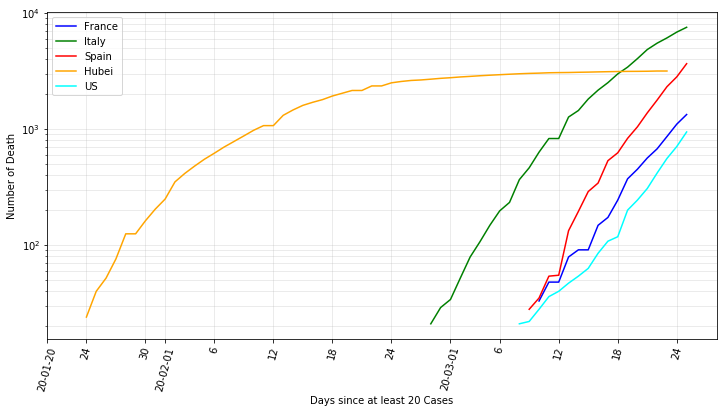

In [166]:
origins = death.when_case_exceed(20)
subset = death.subset(['France', 'Italy', 'Spain', 'Hubei', 'US'])
intervals = subset.intervals(start=origins, window=60, nwindows=1)
for data in subset.split(intervals):
    ax = data.plot()

_ = ax.set(xlabel='Days since at least 20 Cases', ylabel='Number of Death', yscale="log")

Here what's origins looks like 

In [167]:
origins.iloc[0:4]

,Province/State,Country/Region,Lat,Long,date
Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-26
Albania,NaN,Albania,41.1533,20.1683,2020-03-26
Algeria,NaN,Algeria,28.0339,1.6596,2020-03-25
Andorra,NaN,Andorra,42.5063,1.5218,2020-03-26


As well as intervals. The column days is the effective number of days inside the date interval. Usefull to know if one want to fit the data, for instance : `intervals = intervals[intervals['days']>=2]`

In [168]:
intervals

,name,start,end,days
0,France,2020-03-10,2020-05-08,16
1,Italy,2020-02-28,2020-04-27,27
2,Spain,2020-03-09,2020-05-07,17
3,Hubei,2020-01-24,2020-03-23,60
4,US,2020-03-08,2020-05-06,18


## Fit data 
Fit method can perform a fit of time series, two types of fits so far  
 - '2' is fitting a $A 2^{t/T}$ function where T will represent the doubling period  
 - 'exp' if fitting a $A \exp{t/T}$

Bellow the last 10 days is fitted, showing the doubling time for different countries 

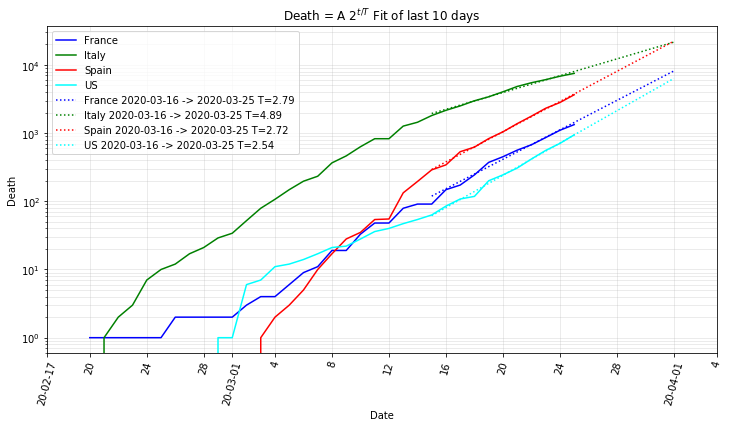

In [169]:
subset = death.subset(['France', 'Italy', 'Spain', 'US'], start="2020-02-20")
fit_result = subset.subset(start=-10).fit('2') # fit the last 10 days

axes = subset.plot()
fit_result.plot_model( ("2020-03-15", "2020-04-01"), axes=axes)
_ =axes.set(yscale='log', xlabel="Date", ylabel="Death", title = "Death = A $2^{t/T}$ Fit of last 10 days")


,Province/State,Country/Region,Lat,Long,day_zero,T,A,rep,ftype,start,end,label,days
France,NaN,France,46.2276,2.2137,2020-03-10,2.669485,148.545217,$A 2^{t/T}$,2,6,13,France T=2.67,8
Italy,NaN,Italy,43.0000,12.0000,2020-02-28,2.594547,151.683727,$A 2^{t/T}$,2,6,13,Italy T=2.59,8
Spain,NaN,Spain,40.0000,-4.0000,2020-03-09,2.652356,286.945847,$A 2^{t/T}$,2,6,13,Spain T=2.65,8
Hubei,Hubei,China,30.9756,112.2707,2020-01-24,3.538870,173.057361,$A 2^{t/T}$,2,6,13,Hubei T=3.54,8
US,NaN,US,37.0902,-95.7129,2020-03-08,2.696725,50.356348,$A 2^{t/T}$,2,6,13,US T=2.70,8


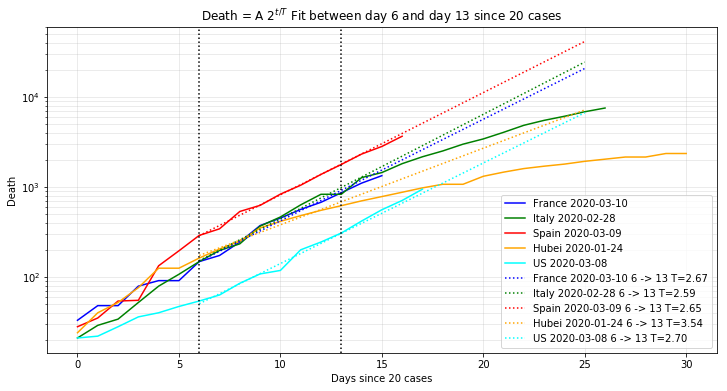

In [170]:
subset = death.subset(['France', 'Italy', 'Spain', 'Hubei','US'])
s, e, c = 6,13, 20
origin = death.when_case_exceed(c)
subset = subset.get_day_indexed(origin).subset(start=0, end=30)

fit_result = subset.subset(start=s, end=e).fit('2') # fit the last 10 days

axes = subset.plot()
fit_result.plot_model( (s, 25), axes=axes)
axes.set(yscale='log', xlabel="Days since %s cases"%c, ylabel="Death", title = "Death = A $2^{t/T}$ Fit between day %s and day %s since %s cases"%(s,e,c))
[axes.axvline(x, color='k', linestyle=":") for x in (s,e)]
fit_result

One can fit in one by defining intervals 

,Province/State,Country/Region,Lat,Long,T,A,rep,ftype,start,end,label,days
Italy,NaN,Italy,43,12,5.12267,11404.7,$A 2^{t/T}$,2,2020-03-10,2020-03-25,Italy T=5.12,16
Italy,NaN,Italy,43,12,3.34706,1673.9,$A 2^{t/T}$,2,2020-03-01,2020-03-10,Italy T=3.35,10
Italy,NaN,Italy,43,12,1.68034,85.0874,$A 2^{t/T}$,2,2020-02-22,2020-02-28,Italy T=1.68,7


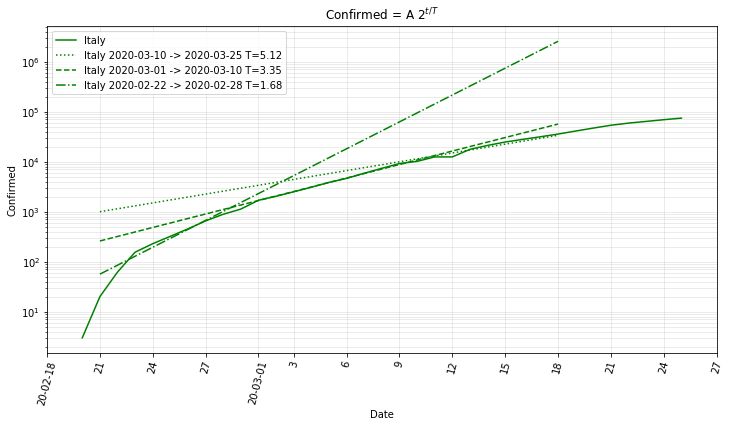

In [171]:
intervals = [('Italy', "2020-03-10", None), ('Italy', "2020-03-01","2020-03-10"), ('Italy', "2020-02-22", "2020-02-28")]

c_it = confirmed.subset( "Italy" , start="2020-02-20")
fit_result = c_it.fit_intervals(intervals)

c_it.plot().set(ylabel="Confirmed", title = "Confirmed = A $2^{t/T}$")
_ = fit_result.plot_model( dates=("2020-02-21","2020-03-18")).set(yscale='log', xlabel="Date")
fit_result

We can create intervals as a slidding window over time. Bellow we create window intervals of 6 days every days from an origin date 

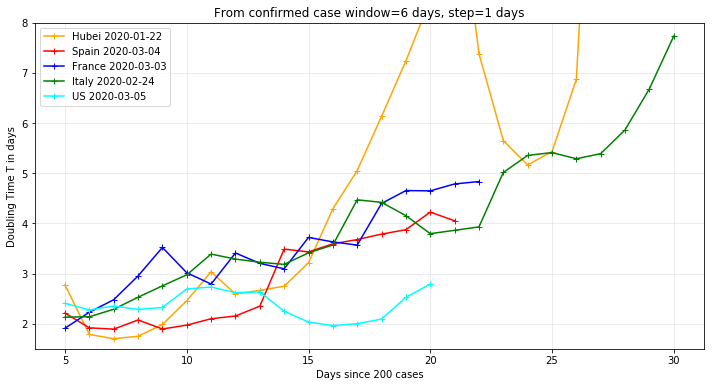

In [172]:
subset = confirmed.subset(['Italy', 'France', 'Spain', 'Hubei', 'US'])
origin = confirmed.when_case_exceed(200)

data = subset.get_day_indexed(origin).subset(start=0, end=30)

# intervals of 6 days every day 
# the mindays keyword assure that their is always 6 points per sample (6 full days)
intervals = data.intervals(window=6, step=1, mindays=6)
result = data.fit_intervals(intervals)
# first argument datekey can be 'start', 'end', 'center' define which date to plot
ax = result.plot(datekey='end', style={'marker':'+'})
_ = ax.set(ylim=(1.5,8), xlabel="Days since 200 cases", ylabel="Doubling Time T in days", 
           title="From confirmed case window=%d days, step=1 days"%(6))  

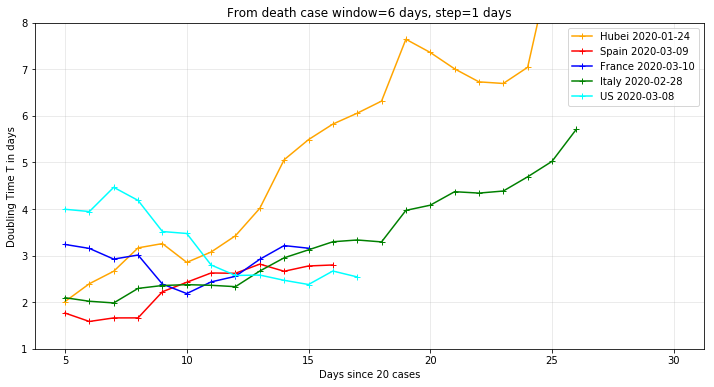

In [173]:
subset = death.subset(['Italy', 'France', 'Spain', 'Hubei', 'US'])
origin = death.when_case_exceed(20)
data = subset.get_day_indexed(origin).subset(start=0, end=30)

intervals = data.intervals(window=6, step=1, mindays=6)
result = data.fit_intervals(intervals)
# first argument datekey can be 'start', 'end', 'center' define which date to plot
ax = result.plot(datekey='end', style={'marker':'+'})
_ = ax.set(ylim=(1,8), xlabel="Days since 20 cases", ylabel="Doubling Time T in days", 
           title="From death case window=%d days, step=1 days"%(6))  

# Plot roportions

## Death over confirmed 

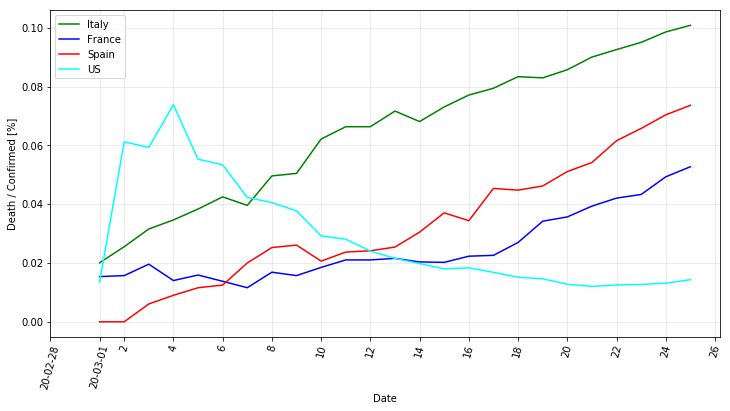

In [174]:
numerator = death.subset(['Italy', 'France', 'Spain', 'US'], start="2020-03-01")
denominator = confirmed.subset( start="2020-03-01") # denominator only requiere to have the same number of dates

_ = numerator.plot_proportion(denominator).set(ylabel="Death / Confirmed [%]", xlabel="Date")

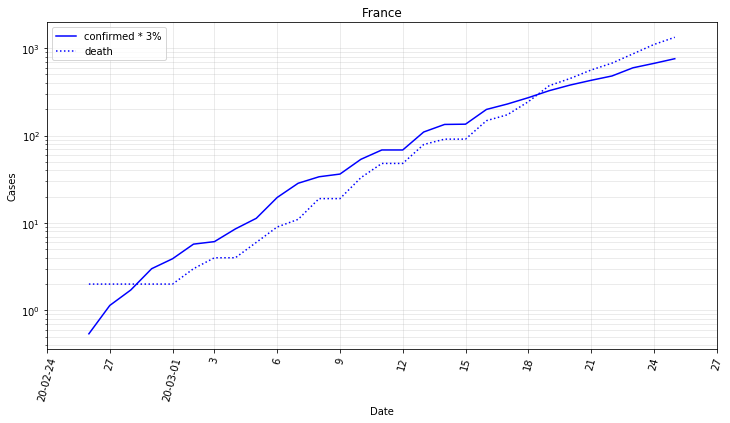

In [175]:
c, d = (data.subset('France', start="2020-02-26") for data in (confirmed, death))
c = c.cases * 0.03
c.plot(style={'label':'confirmed * 3%'})
_ = d.plot(style={'label':'death'}).set(yscale='log', xlabel="Date", ylabel="Cases", title="France")
